### 1. Seleksi Unvariate
---
Metode paling sederhana dan tercepat didasarkan pada uji statistik univariat. Untuk setiap fitur, ukur seberapa kuat target bergantung pada fitur menggunakan uji statistik seperti  χ2 (chi-square) or ANOVA.

Uji statistik dapat digunakan untuk memilih fitur-fitur tersebut yang memiliki relasi paling kuat dengan variabel output/target.
Library scikit-learn menyediakan class *SelectKBest* yang digunakan untuk serangkaian uji statistik berbeda untuk memilih angka spesifik dari fitur. Berikut ini adalah uji statistik chi-square utk fitur non-negatif untuk memilih 10 fitur terbaik dari dataset *Mobile Price Range Prediction*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
# memuat data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Collage/Semester 3/Pengantar Data Sains/Pertemuan 4/dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [ ]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:32]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

In [ ]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate
0,1,8,5,2,1,1,1,13,10,6,...,0,0.000000,0,0,0,0,0,0.000000,0,10.8
1,1,6,1,11,1,1,1,1,3,4,...,6,14.000000,0,0,6,6,6,13.666667,0,13.9
2,1,1,5,5,1,1,1,22,27,10,...,0,0.000000,0,0,6,0,0,0.000000,0,10.8
3,1,8,2,15,1,1,1,23,27,6,...,6,13.428571,0,0,6,10,5,12.400000,0,9.4
4,2,12,1,3,0,1,1,22,28,10,...,5,12.333333,0,0,6,6,6,13.000000,0,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,5,13.600000,0,0,6,8,5,12.666667,0,15.5
4420,1,1,2,15,1,1,19,1,1,10,...,6,12.000000,0,0,6,6,2,11.000000,0,11.1
4421,1,1,1,12,1,1,1,22,27,10,...,7,14.912500,0,0,8,9,1,13.500000,0,13.9
4422,1,1,1,9,1,1,1,22,27,8,...,5,13.800000,0,0,5,6,5,12.000000,0,9.4


In [ ]:
y

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [ ]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10) # mengambil 10 KBest terbaik dengan perhitungan chi square
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                     Specs        Score
29        Curricular units 2nd sem (grade)  3980.634363
28     Curricular units 2nd sem (approved)  3530.526536
22     Curricular units 1st sem (approved)  2519.752869
23        Curricular units 1st sem (grade)  2379.656478
1                         Application mode   812.910193
17                       Age at enrollment   715.976606
27  Curricular units 2nd sem (evaluations)   326.618731
16                      Scholarship holder   308.105936
5                   Previous qualification   240.232907
13                                  Debtor   229.847548


### 2. Feature Importance
---
**Feature importance** mengacu pada kelas teknik untuk menetapkan skor ke fitur input ke model prediktif yang menunjukkan *importance* relatif dari setiap fitur saat membuat prediksi. Skor *Feature importance* dapat dihitung untuk masalah yang melibatkan prediksi nilai numerik, yang disebut regresi, dan masalah yang melibatkan prediksi label kelas, yang disebut klasifikasi.

Skor digunakan dalam berbagai situasi dalam masalah pemodelan prediktif, seperti:

* Lebih memahami data.
* Lebih memahami model.
* Mengurangi jumlah fitur input.
* memberi  skor untuk setiap fitur data, semakin tinggi skor semakin penting atau relevan fitur tersebut terhadap variabel output

Inbuilt yang dilengkapi dengan Pengklasifikasi Berbasis Pohon (Tree Based Classifier), kami akan menggunakan Pengklasifikasi Pohon Ekstra untuk mengekstraksi 10 fitur teratas untuk kumpulan data

In [ ]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00767495 0.02900063 0.02172445 0.03398617 0.00648484 0.01000453
 0.00314095 0.0315209  0.02984399 0.03196833 0.03459318 0.01653003
 0.00252482 0.0185544  0.05849907 0.01962194 0.02893269 0.03693286
 0.00311979 0.00978943 0.02479983 0.03912098 0.07512279 0.07122007
 0.00955115 0.00803731 0.02775512 0.0425168  0.11451939 0.10916856
 0.00862777 0.03511229]


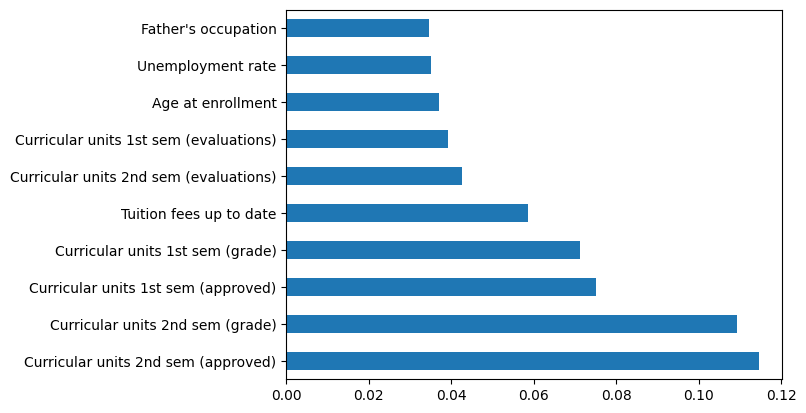

In [ ]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3. Matriks Korelasi dengan Heatmap
---

* Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.
* Korelasi bisa positif (kenaikan satu nilai fitur meningkatkan nilai variabel target) atau negatif (kenaikan satu nilai fitur menurunkan nilai variabel target)
* Heatmap memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas fitur yang berkorelasi menggunakan seaborn library


In [ ]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr(numeric_only=True)
top_corr_features = corrmat.index

### Matriks Korelasi dengan Heatmap (lanjutan)
---

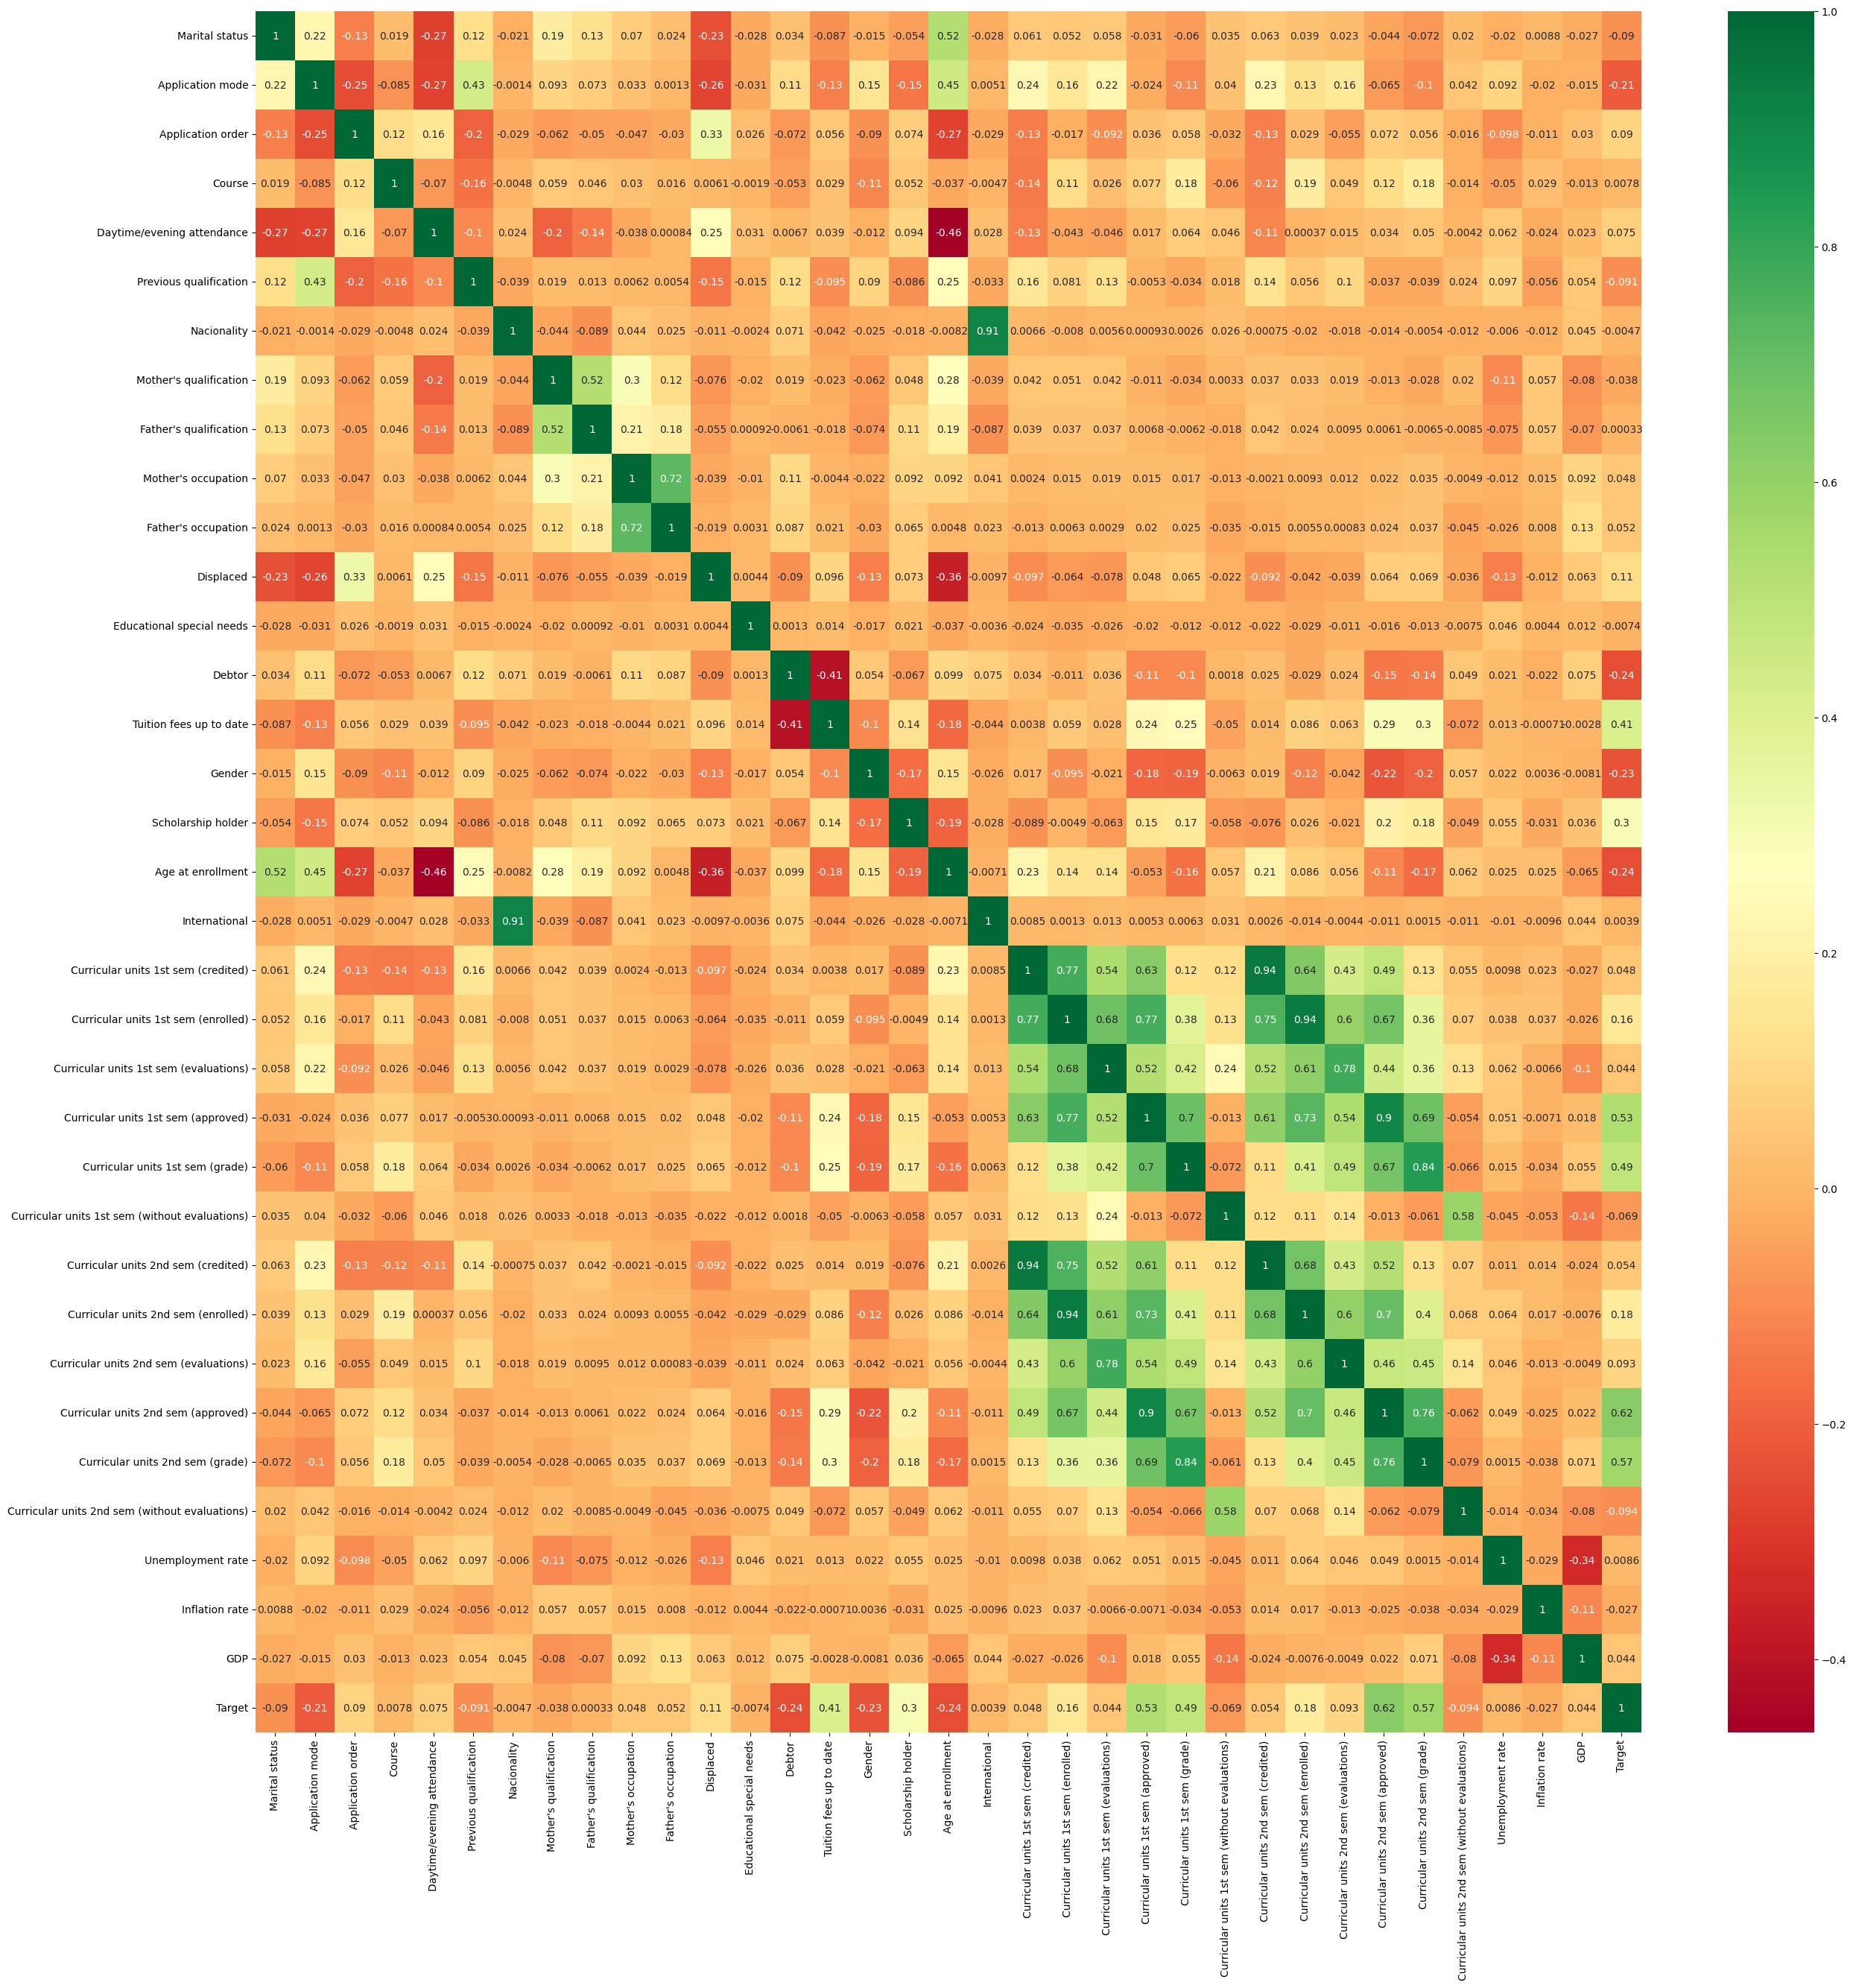

In [ ]:
# plot heatmap
plt.figure(figsize=(30,30))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Kesimpulan
* 'Nacionality' memiliki korelasi yang kuat 'Internasional' dengan nilai korelasi 0.91 (mendekati 1).
* Adapula nilai korelasi 0.94 yang diperoleh dari hubungan korelasi antara ('Circular unit 1st sem (credited)' dan 'Circular unit 2nd sem (credited)' serta 'Circular unit 1st sem (enrolled)' dan 'Circular unit 2nd sem (enrolled)').
* 'Age at environment' dan 'Daytime/evening attendance' memiliki korelasi yang berbanding terbalik dengan nilai korelasi -0.46 (mendekati -1) dimana kedua paramater tersebut memiliki perbandingan yang berlawanan arah.
* Ada pula beberapa parameter yang memiliki korelasi lemah bahkan nyaris tidak berkorelasi seperti contoh korelasi antara parameter 'Martial status' dan 'course' dengan nilai korelasi 0.019 (mendekati 0).
* Target dipengaruhi oleh pembayaran yang sesuai jadwal dengan korelasi 0.41.
* Target juga dipengaruhi secara positif oleh jumlah sks yang disetujui dan dijalani pada setiap mahasiswa pada semester 1 dan 2 dengan korelasi sebesar 0.53. Jadi, semakin tinggi sks seorang siswa, maka kemungkinan orang tersebut lulus cukup besar.  